In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

rng = np.random
print (" packges loaded")

 packges loaded


In [3]:
# pamameters
learning_rate = 0.01
training_epochs = 30
display_step = 50

In [5]:
# training data
train_X = np.asarray( [ 3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 5.342, 2.167, 
                                      7.42, 10.34, 5.314, 7.909, 5.564, 9.23, 3.1])
train_Y = np.asarray( [ 1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.569, 2.53, 1.221, 
                                      2.87, 3.654, 1.56, 2.976, 2.42, 2.94, 1.4])
n_samples = train_X.shape[0]

In [6]:
# tf Graph input 
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set model weight
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

In [9]:
#  构造一个线性模型
pred = tf.add(tf.multiply(X, W) , b)


In [11]:
# mean squars error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# initializing the variables
#init = tf.initialize_all_variables()
init = tf.global_variables_initializer()

 Optimization finished !


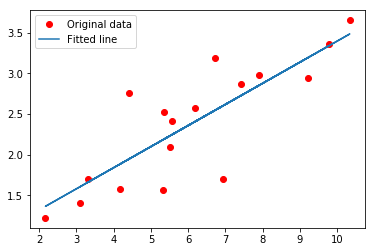

In [12]:
# Launch the Graph
with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epoch in range (training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x,  Y: y})
            
        # display logs per epoch step
        if(epoch+1) % display_step ==0:
            c = sess.run(cost , feed_dict = {X: train_X, Y: train_Y})
            print ("Epoch :  %4d  cost :  %.9f  W : %9f  b: %9f") % ((epoch+1), c , sess.run(W),  sess.run(b))
        
    print  " Optimization finished !"
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    
    #  Display 
    plt.plot(train_X, train_Y, 'ro', label = 'Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()